In [9]:
import numpy as np
import pickle
import pandas as pd

reportedData = {() : [0]*9,
                (1,) : [0]*9,
                (2,) : [0]*9,
                (3,) : [0.0025, 0.0098, 0.0317, 0.0271, 0.0893, 0.1867, 0.1763, 0.3394, 0.5368],
                (4,) : [0]*9,
                (1,2) : [0]*9,
                (1,3) : [0.0013, 0.0247, 0.0352, 0.0315, 0.0552, 0.0574, 0.0554, 0.0455, 0.0377],
                (1,4) : [0]*9,
                (2,3) : [0.0007, 0.0013, 0.0021, 0.0018, 0.0027, 0.0033, 0.0033, 0.0027, 0.0021],
                (2,4) : [0]*9,
                (3,4) : [0.1230, 0.2561, 0.4318, 0.4130, 0.5556, 0.6212, 0.6309, 0.5693, 0.4296],
                (1,2,3) : [0.0024, 0.0024, 0.0015, 0.0014, 0.0013, 0.0007, 0.0007, 0.0003, 0.0001],
                (1,3,4) : [0.6079, 0.5815, 0.4691, 0.4791, 0.3109, 0.1706, 0.1708, 0.0812, 0.0302],
                (1,2,4) : [0]*9,
                (2,3,4) : [0.0617, 0.0591, 0.0048, 0.0494, 0.0309, 0.0173, 0.0178, 0.0089, 0.0032],
                (1,2,3,4) : [0.1887, 0.0911, 0.0370, 0.0381, 0.0120, 0.0034, 0.0036, 0.0008, 0.0001]
                }

In [141]:
#dataPath = "p_[ 0.2  0.2  0.2  0.2  0. ]_tau_[ 0.04  4.    2.    1.    9.  ].pickle"; tI = 0; pI = 0
#dataPath  = "p_[ 0.2  0.2  0.2  0.2  0. ]_tau_[ 0.08  8.    4.    2.    9.  ].pickle"; tI = 1; pI = 0
#dataPath  = "p_[ 0.2  0.2  0.2  0.2  0. ]_tau_[  0.16  16.     8.     4.     9.  ].pickle"; tI = 2; pI = 0

#dataPath = "p_[ 0.5  0.5  0.5  0.5  0. ]_tau_[ 0.04  4.    2.    1.    9.  ].pickle"; tI = 0; pI = 3
dataPath  = "p_[ 0.5  0.5  0.5  0.5  0. ]_tau_[ 0.08  8.    4.    2.    9.  ].pickle"; tI = 1; pI = 3
#dataPath  = "p_[ 0.5  0.5  0.5  0.5  0. ]_tau_[  0.16  16.     8.     4.     9.  ].pickle"; tI = 2; pI = 3

#dataPath = "p_[ 0.8  0.8  0.8  0.8  0. ]_tau_[ 0.04  4.    2.    1.    9.  ].pickle"; tI = 0; pI = 6
#dataPath  = "p_[ 0.8  0.8  0.8  0.8  0. ]_tau_[ 0.08  8.    4.    2.    9.  ].pickle"; tI = 1; pI = 6
#dataPath  = "p_[ 0.8  0.8  0.8  0.8  0. ]_tau_[  0.16  16.     8.     4.     9.  ].pickle"; tI = 2; pI = 6

[results, conf] = pickle.load(file = open("./results/"+dataPath, 'rb'))

In [142]:
β_post, var_post, chain, probs, tmp_models = results

models = dict()
for key in tmp_models.keys():
    models[(len(key),key)] = tmp_models[key]

allP1 = []    
modelConfigs = []
for key in sorted(models.keys()):
    if len(key[1]) > 0 and key[1][-1] == 4:
        modelConfigs.append(key[1][0:-1])
        allP1.append(models[key]/float(conf['iterations']))
        #print("{}: {}".format(key[1][0:-1], models[key]/float(iterations)))

"""
This is the secondly described approach for calculating the 
posterior probabilities for each model. Instead of averaging
over the indicator variables, we average over the relevant
probability values.
@param beta: array of booleans where an entry denotes whether
the corresponding beta is non-zero. (i.e. [T,F,F,F] would be 
a model with the last 3 coefficients set to zero)
@param probs: p-values along markov chain. (as returned by variable_selection())
"""
def modelProb(betas, probs):
    anti_probs = 1 - probs
    allProb = np.concatenate([anti_probs[:,0:-1], probs[:,0:-1]], axis = 1)
    betas = np.atleast_2d(betas)
    indices = np.concatenate([betas, np.invert(betas)], axis = 1)
    return np.sum(np.product(allProb[:,indices.flatten()], axis = 1)) / allProb.shape[0]

allP2 = []
# only intercept
allP2.append(modelProb([False, False, False, False], probs))
# one predictor
allP2.append(modelProb([True, False, False, False], probs))
allP2.append(modelProb([False, True, False, False], probs))
allP2.append(modelProb([False, False, True, False], probs))
allP2.append(modelProb([False, False, False, True], probs))
# two predictors
allP2.append(modelProb([True, True, False, False], probs))
allP2.append(modelProb([True, False, True, False], probs))
allP2.append(modelProb([True, False, False, True], probs))
allP2.append(modelProb([False, True, True, False], probs))
allP2.append(modelProb([False, True, False, True], probs))
allP2.append(modelProb([False, False, True, True], probs))
# three predictors
allP2.append(modelProb([True, True, True, False], probs))
allP2.append(modelProb([True, True, False, True], probs))
allP2.append(modelProb([True, False, True, True], probs))
allP2.append(modelProb([False, True, True, True], probs))
# four predictors
allP2.append(modelProb([True, True, True, True], probs))

sum(allP2)

1.0

In [146]:
print("posterior(old)\tposterior(rep)\tdifference\tmodel")
largestDiff = 0
p1_sum = 0
rep_sum = 0
for k, p1 in zip(modelConfigs, allP1):
    model = np.array(k, dtype = int)+1
    repValue = reportedData[tuple(model)][tI+pI]
    diff = p1 - repValue
    p1_sum += p1
    rep_sum += repValue
    #print("diff: {}".format(abs(diff)))
    if abs(diff) > largestDiff: largestDiff = abs(diff)        
    print("{:.5f}\t\t{:.5f}\t\t{:+.5f}\t{}".format(p1, repValue, diff, model))
print("\nsum posterior(old): {}".format(p1_sum))
print("\nsum posterior(reported): {}".format(rep_sum))
print("\nLargest absolute difference between paper and our results: {:.5f}".format(largestDiff))

posterior(old)	posterior(rep)	difference	model
0.00005		0.00000		+0.00005	[]
0.00003		0.00000		+0.00003	[1]
0.00007		0.00000		+0.00007	[2]
0.08712		0.08930		-0.00218	[3]
0.00000		0.00000		+0.00000	[4]
0.00004		0.00000		+0.00004	[1 2]
0.05027		0.05520		-0.00493	[1 3]
0.00001		0.00000		+0.00001	[1 4]
0.00265		0.00270		-0.00005	[2 3]
0.00002		0.00000		+0.00002	[2 4]
0.50537		0.55560		-0.05023	[3 4]
0.00140		0.00130		+0.00010	[1 2 3]
0.00006		0.00000		+0.00006	[1 2 4]
0.30693		0.31090		-0.00397	[1 3 4]
0.03391		0.03090		+0.00301	[2 3 4]
0.01207		0.01200		+0.00007	[1 2 3 4]

sum posterior(old): 0.9999999999999999

sum posterior(reported): 1.0578999999999998

Largest absolute difference between paper and our results: 0.05023


In [140]:
# Sort models by probability
rankedReported = sorted(zip(np.array(list(reportedData.values()))[:,tI+pI],reportedData.keys()),reverse=True)
rankedResults = sorted(zip(allP1, modelConfigs),reverse=True)
print("p (reported)\tmodel(reported)\tmodel(our)\tp (our)\n")
for (k1, v1), (k2, v2) in zip(rankedReported, rankedResults):
    print("{:5f}\t{:10s}\t{:10s}\t{:5f}".format(k1, str(v1), str(tuple(np.array(v2)+1)), k2))

p (reported)	model(reported)	model(our)	p (our)

0.536800	(3,)      	(3,)      	0.508130
0.429600	(3, 4)    	(3, 4)    	0.418440
0.037700	(1, 3)    	(1, 3)    	0.035860
0.030200	(1, 3, 4) 	(1, 3, 4) 	0.031460
0.003200	(2, 3, 4) 	(2, 3, 4) 	0.003400
0.002100	(2, 3)    	(2, 3)    	0.001990
0.000100	(1, 2, 3, 4)	(1, 2, 3, 4)	0.000240
0.000100	(1, 2, 3) 	()        	0.000170
0.000000	(4,)      	(1, 2, 3) 	0.000110
0.000000	(2, 4)    	(1,)      	0.000050
0.000000	(2,)      	(2,)      	0.000040
0.000000	(1, 4)    	(4,)      	0.000030
0.000000	(1, 2, 4) 	(1, 4)    	0.000030
0.000000	(1, 2)    	(2, 4)    	0.000020
0.000000	(1,)      	(1, 2)    	0.000020
0.000000	()        	(1, 2, 4) 	0.000010


In [37]:
# alternative way to compute the posterior
print("posterior(old)    difference     posterior(new)\t model")
for k, p1, p2 in zip(modelConfigs, allP1, allP2):
    print("{:.5f} \t {:+.5f} \t {:.5f} \t {}".format(p1, p1-p2, p2, np.array(k)+1))

posterior(old)    difference     posterior(new)	 model
0.00017 	 +0.00000 	 0.00017 	 []
0.00005 	 +0.00001 	 0.00004 	 [1]
0.00004 	 -0.00000 	 0.00004 	 [2]
0.50813 	 -0.00034 	 0.50847 	 [3]
0.00003 	 -0.00001 	 0.00004 	 [4]
0.00002 	 +0.00001 	 0.00001 	 [1 2]
0.03586 	 +0.00032 	 0.03554 	 [1 3]
0.00003 	 +0.00002 	 0.00001 	 [1 4]
0.00199 	 +0.00011 	 0.00188 	 [2 3]
0.00002 	 +0.00001 	 0.00001 	 [2 4]
0.41844 	 +0.00025 	 0.41819 	 [3 4]
0.00011 	 -0.00019 	 0.00030 	 [1 2 3]
0.00001 	 -0.00000 	 0.00001 	 [1 2 4]
0.03146 	 -0.00006 	 0.03152 	 [1 3 4]
0.00340 	 +0.00035 	 0.00305 	 [2 3 4]
0.00024 	 -0.00047 	 0.00071 	 [1 2 3 4]


In [16]:
dataset = pd.read_csv('./data/happyness_data.csv', delimiter=' ')[['happy','money','sex','love','work']]
X = dataset[['money','sex','love','work']]
y = dataset[['happy']]
if type(X) == pd.DataFrame:
    X = np.concatenate([X.as_matrix(), np.ones([X.shape[0],1])], axis = 1).astype(np.float64)
    y = y.as_matrix().astype(np.float64)

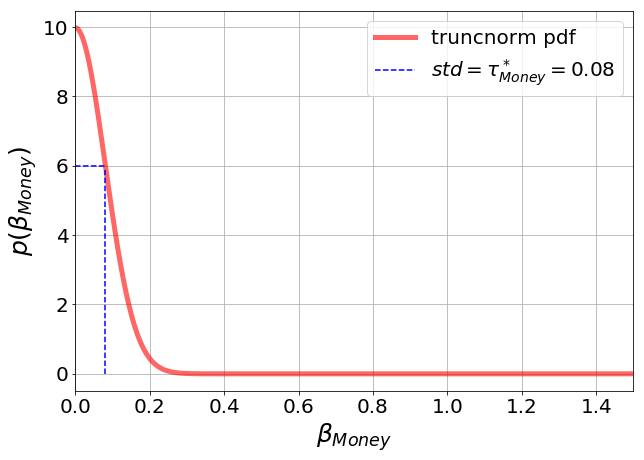

In [136]:
# This cell just creates a figure that I use in the slides
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('legend', fontsize=20)

a, b = 0, 9999999
x = np.linspace(truncnorm.ppf(0.001, a, b),
                truncnorm.ppf(0.9, a, b), 1000)

plt.figure(figsize = (10,7))
plt.plot(x, truncnorm.pdf(x, a, b, 0, 0.08),
       'r-', lw=5, alpha=0.6, label='truncnorm pdf')
plt.grid()
plt.xlabel("$β_{Money}$", fontsize = 25)
plt.ylabel("$p(β_{Money})$", fontsize = 25)
plt.xlim([0, 1.5])
plt.plot(np.ones([50,1]) * 0.08, np.arange(0,6,6/50),'b--', markersize = 10, label = '$std = τ_{Money}^* = 0.08$')
plt.plot(np.arange(0, 0.08, 0.08/50.), 6 * np.ones([50,1]), 'b--', markersize = 10)
plt.legend(loc = 'best')
plt.savefig('./truncatedNormal.pdf')
plt.show()